In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-05-10 15:31:05.847754


# Make_Circles Binary classification example with Tensorflow

1. Build Keras sequential layers using the relu activation function on the top layers to achieve non-linearity
2. Use the sigmoid function on the output layer for binary classification
3. Use binary_crossentropy as a loss function for binary classification
4. Buid sequential layers, compile with optimizer (Adam or SGD) choosing the right (sensitive) learning rate and fit for some number of epochs.

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# Check out the different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

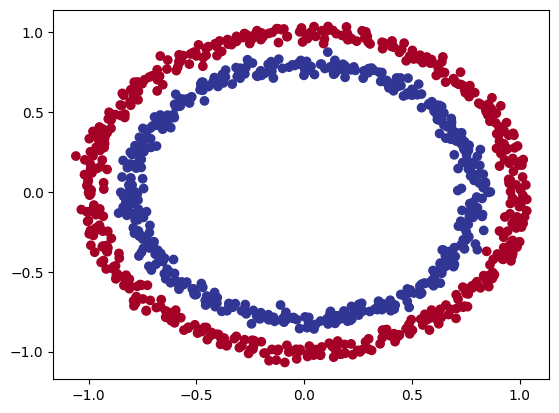

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(80, activation="relu"), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer
])

# Compile the model
model1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.5980
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.6010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.7550
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.9070
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.9630
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4090 - accuracy: 0.9850
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.9980
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


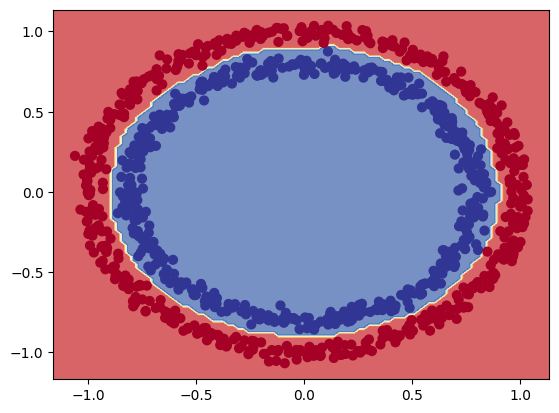

In [11]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model1, X, y)

## Sample split into training and test set

In [12]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6831 - accuracy: 0.5800
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.6888
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.9237
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9837
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9962
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9900
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9950
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9837
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9875
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9712
Epoch 11/25
25/25 [

In [14]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000
Model loss on the test set: 0.0018949778750538826
Model accuracy on the test set: 100.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


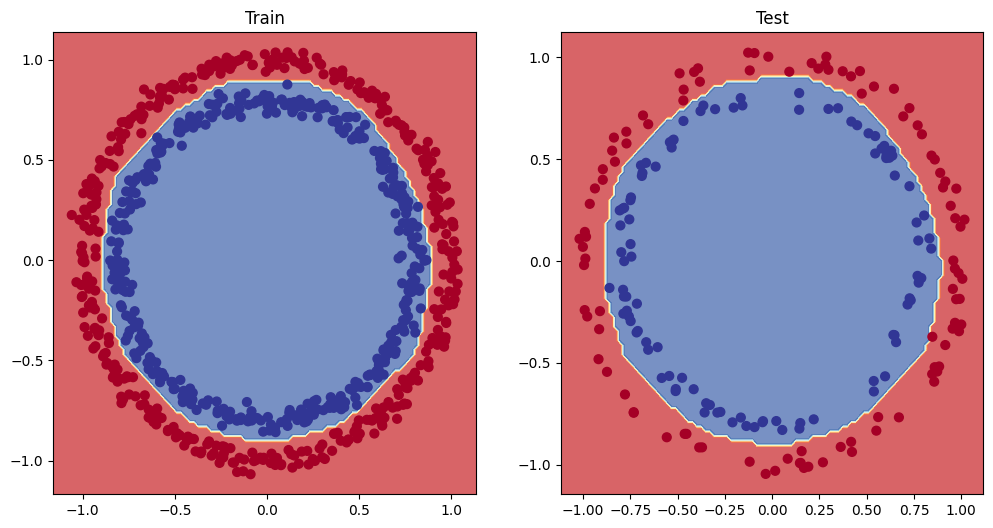

In [15]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_8 training curves')

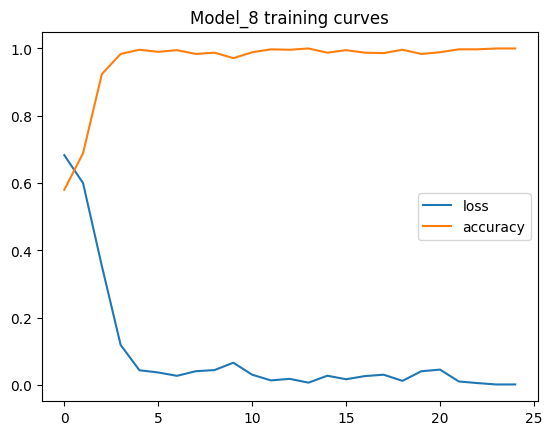

In [16]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [17]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_8.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [18]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

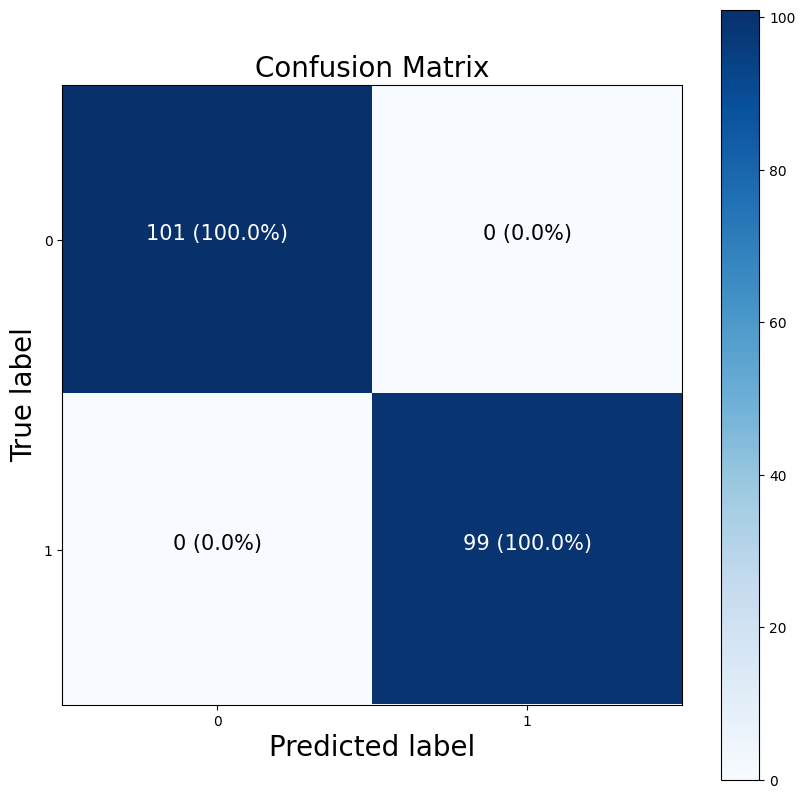

In [19]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multi-class classification with the inbuilt Fashion MNIST dataset
1. Build sequential layer, using relu activation function in the inner layers and specifying input shape at the top layer
2. Use softmax activation function at the output layer specifying the number of classes
3. Use SparseCategoricalCrossentropy as the loss function for multi-class classification.

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [21]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

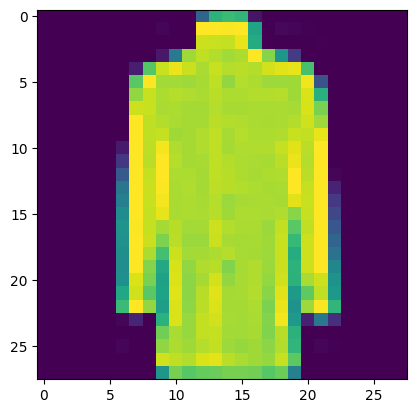

In [23]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[75]);

In [24]:
# Check our samples label
train_labels[75]

4

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

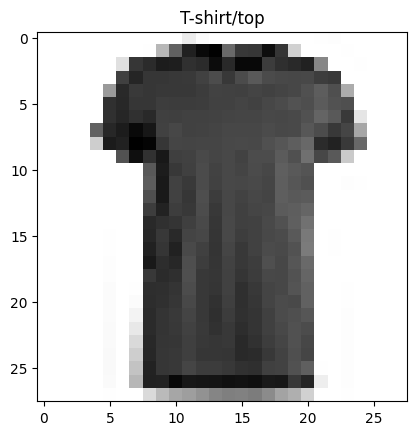

In [26]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

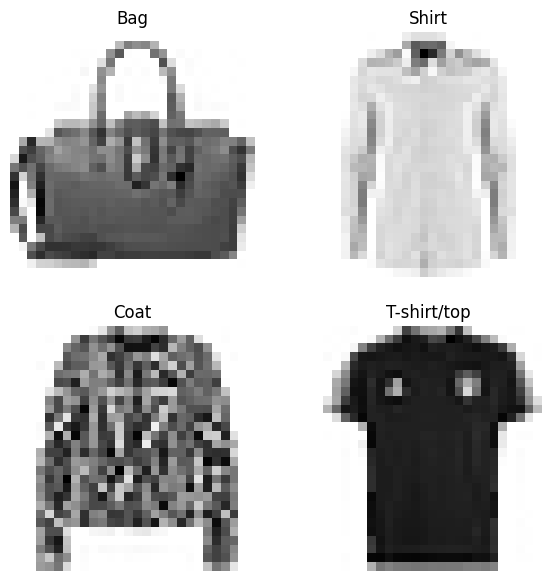

In [28]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [29]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [30]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [31]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=100,
                            validation_data=(test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4895 - accuracy: 0.8249 - val_loss: 0.4108 - val_accuracy: 0.8508
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3639 - accuracy: 0.8672 - val_loss: 0.4553 - val_accuracy: 0.8469
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3311 - accuracy: 0.8792 - val_loss: 0.3724 - val_accuracy: 0.8642
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3078 - accuracy: 0.8868 - val_loss: 0.3664 - val_accuracy: 0.8699
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2898 - accuracy: 0.8918 - val_loss: 0.3569 - val_accuracy: 0.8715
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2758 - accuracy: 0.8966 - val_loss: 0.3676 - val_accuracy: 0.8624
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2659 - accuracy: 0.8997 - val_loss: 0.3661 - 

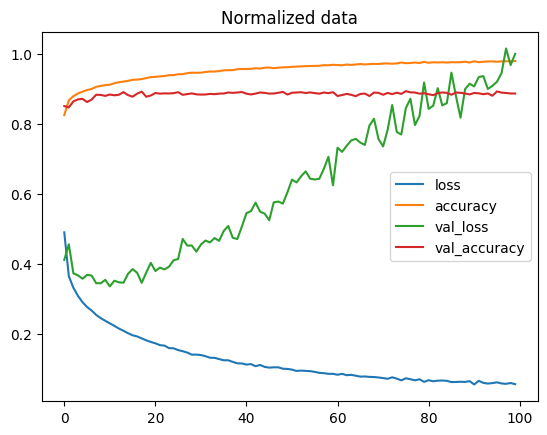

In [32]:
import pandas as pd

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [33]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [35]:
# Make predictions with the most recent model
y_probs = model_12.predict(test_data) # "probs" is short for probabilities


313/313 [==============================] - 1s 2ms/step


In [36]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [37]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[838,   1,  11,  23,   6,   2, 115,   0,   4,   0],
       [  3, 981,   0,   8,   2,   0,   3,   0,   3,   0],
       [ 17,   2, 788,  17,  89,   0,  87,   0,   0,   0],
       [ 15,  15,   8, 906,  27,   0,  26,   0,   3,   0],
       [  3,   2,  77,  29, 791,   0,  95,   0,   3,   0],
       [  1,   0,   0,   0,   0, 974,   0,  19,   0,   6],
       [115,   2,  64,  31,  43,   1, 732,   0,  12,   0],
       [  0,   0,   0,   0,   0,  10,   0, 985,   0,   5],
       [  6,   1,   1,   5,   1,   5,  10,   5, 966,   0],
       [  1,   0,   0,   1,   0,  10,   0,  82,   0, 906]])

In [38]:
import numpy as np

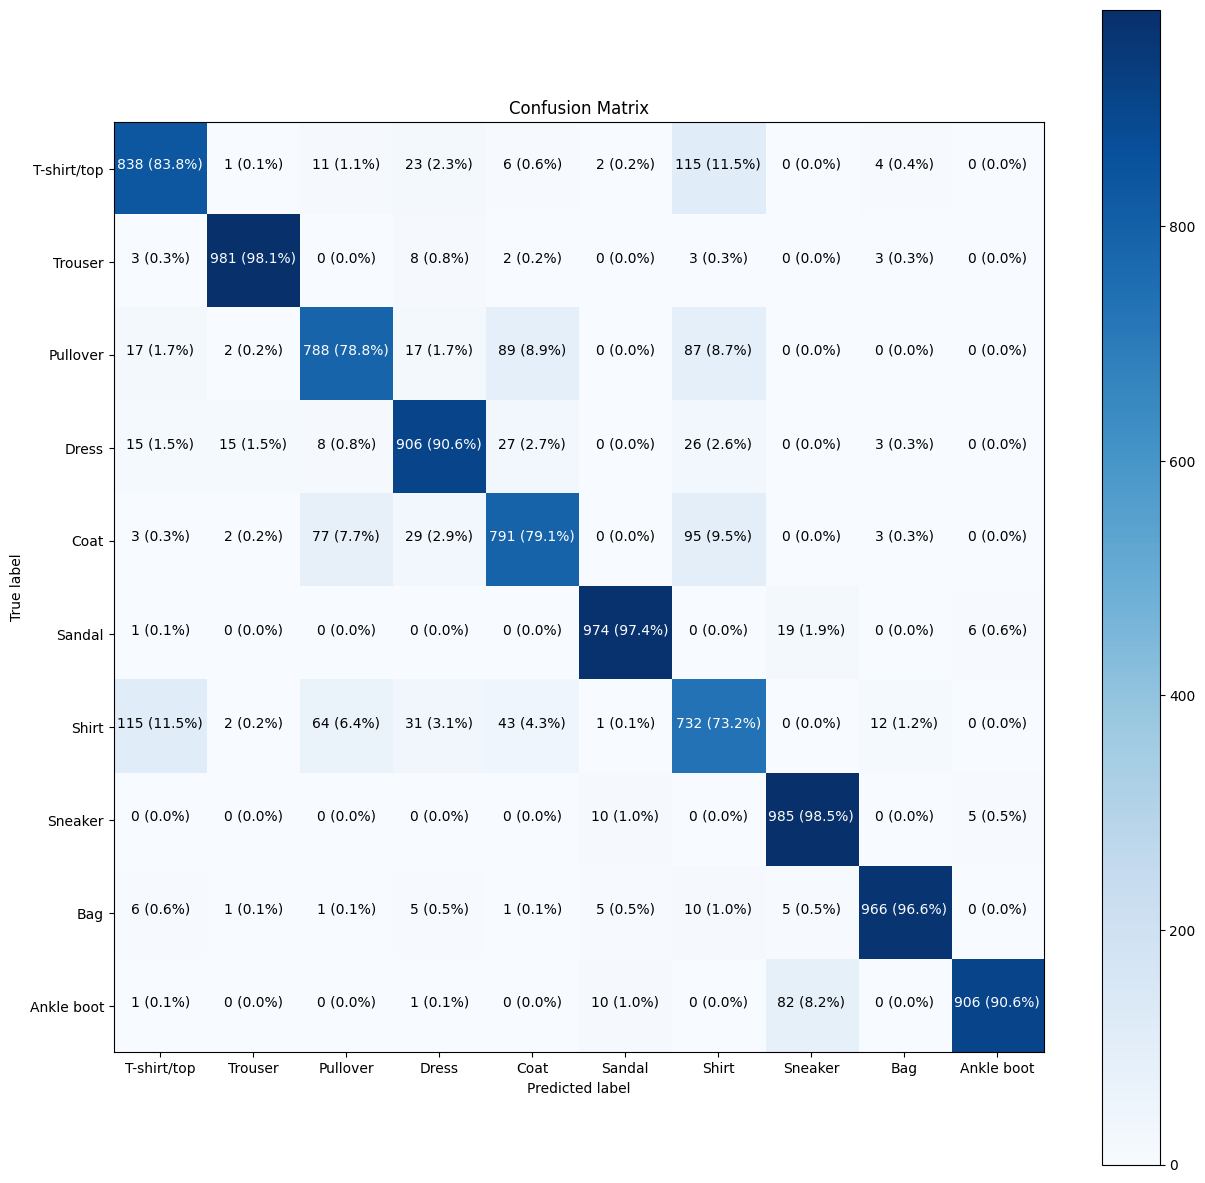

In [39]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [40]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 21ms/step


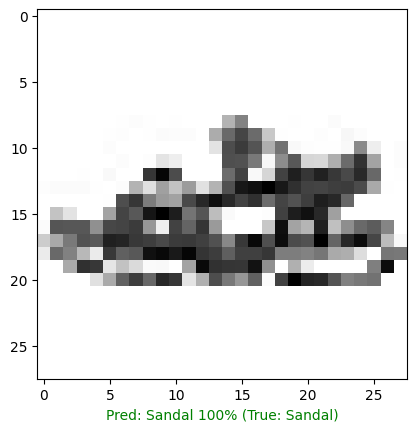

In [42]:
# Check out a random image as well as its prediction
plot_random_image(model=model_12,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [43]:
model_12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


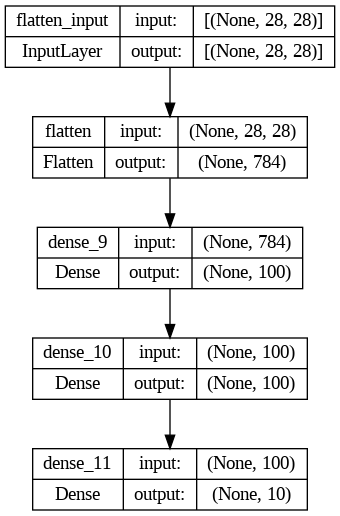

In [44]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_12, show_shapes=True)